### INTRODUCTION


The purpose of this work is to analyse the labour market Italian dataset, by forcusing on the Lombardy zone. The goals of this project are:
To analyse, visualise and compare the main factors in labour acquisition such as: gender, age, economic sector, study qualification and others.
To identify some statistical attribute in data, primarily on Age, being the average.
    
Labour force dataset and its description is composed of the following main components:

-Date
-Gender
-Age
-Economic Sector
-Study title
-Workmode
-Contract
-Province of the Business.


### _LIBRARIES 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import binom
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


The loading of the Labour dataset which was downloaded in csv format.

In [2]:
data1 = pd.read_csv("rapp_pror_16-17.csv")

A glance at the dataset.

In [3]:
data1

,DATE,GENDER,AGE,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
0,1/1/2016,M,24,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
1,1/1/2016,F,25,Alberghi,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
2,1/1/2016,M,26,Pulizia generale (non specializzata) di edifici,LICENZA ELEMENTARE,LAVORO INTERMITTENTE,TEMPO PIENO,MILANO,ITALIA
3,1/1/2016,M,22,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE VERTICALE,MILANO,ITALIA
4,1/1/2016,M,59,Pulizia generale (non specializzata) di edifici,NESSUN TITOLO DI STUDIO,LAVORO INTERMITTENTE,TEMPO PIENO,MILANO,ITALIA
...,...,...,...,...,...,...,...,...,...
774248,12/12/2017,M,30,Fabbricazione di altri prodotti in gomma nca,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
774249,12/12/2017,F,23,Fabbricazione di altre parti ed accessori per ...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
774250,12/12/2017,M,40,Gelaterie e pasticcerie,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,VARESE,ITALIA
774251,12/12/2017,M,21,Fabbricazione di strutture metalliche e parti ...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA


###### Next gather some information about different column in dataset.
##### Information about the number of rows, columns, column data types, memory usage, etc.

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774253 entries, 0 to 774252
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATE                    774253 non-null  object
 1   GENDER                  774253 non-null  object
 2   AGE                     774253 non-null  int64 
 3   ECONOMIC SECTOR DETAIL  773791 non-null  object
 4   STUDY TITLE             774253 non-null  object
 5   CONTRACT                774253 non-null  object
 6   WORKMODE                774253 non-null  object
 7   PROVINCE OF BUSINESS    774253 non-null  object
 8   ITALY                   774253 non-null  object
dtypes: int64(1), object(8)
memory usage: 53.2+ MB


Base on the memory usage, which is high, due to the dataset size. 

In [5]:
print("The average age within the workforce :")
meanAge  = data1['AGE'].mean()
print(meanAge)

print("-------------------------------------------")

print("The common age-gap within the workforce :")
modeAge  = data1['AGE'].mode()
print(modeAge)

print("-------------------------------------------")

print("The most employed sector :")
modeSector  = data1['ECONOMIC SECTOR DETAIL'].mode()
print(modeSector)

print("-------------------------------------------")

print("The common contractual agreement :")
modeContract  = data1['CONTRACT'].mode()
print(modeContract)

The average age within the workforce :
35.151995536342774
-------------------------------------------
The common age-gap within the workforce :
0    23
dtype: int64
-------------------------------------------
The most employed sector :
0    Pulizia generale (non specializzata) di edifici
dtype: object
-------------------------------------------
The common contractual agreement :
0    LAVORO A TEMPO DETERMINATO
dtype: object


In [6]:
data1.describe(include=object)

,DATE,GENDER,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
count,774253,774253,773791,774253,774253,774253,774253,774253
unique,288,2,1135,12,20,5,12,160
top,8/4/2017,M,Pulizia generale (non specializzata) di edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,12137,450887,31940,300210,685267,510216,296378,581044


In [7]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,774253.0,35.151996,11.355002,0.0,25.0,34.0,44.0,96.0


C:\Users\kwabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness Distribution: 0.49


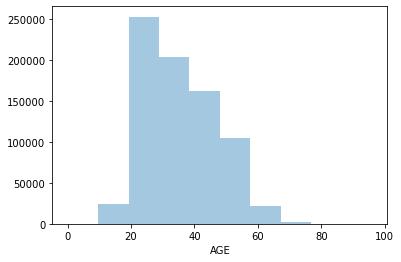

In [8]:
dist = sns.distplot(data1.AGE, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(data1.AGE),2))

In [9]:
def get_dataset_range(data1, show=True):
    """ Gets the dataset date range using the data column.

    Args:
        df (pandas.core.frame.DataFrame): Object representing the Pandas dataframe.
        show (bool): Shows the first and last date available in the dataset.
    Returns: 
        tuple: the dataset date range.
    """
    first = data1['DATE'].iloc[0]
    last = data1['DATE'].iloc[-1]
    if show:
        print(f"FIRST ENTRY DATE: {first}")
        print(f"LAST  ENTRY DATE: {last}")
    return first, last 

In [10]:
#the start and end of the records entry.

FIRST_DATE, LAST_DATE = get_dataset_range(data1)

FIRST ENTRY DATE: 1/1/2016
LAST  ENTRY DATE: 12/12/2017


In [11]:
#Grouping of the data based on the Sector of employement


df1_groupby_sector = data1.groupby('ECONOMIC SECTOR DETAIL')
df1_groupby_sector.size()

ECONOMIC SECTOR DETAIL
Acquacoltura in acqua di mare, salmastra o lagunare e servizi connessi                               174
Acquacoltura in acque dolci e servizi connessi                                                        22
Affari esteri                                                                                         44
Affittacamere per brevi soggiorni, case ed appartamenti per vacanze, bed and breakfast, residence    658
Affitto di aziende                                                                                    56
                                                                                                    ... 
Trattamento igienico del latte                                                                       122
Trivellazioni e perforazioni                                                                         185
Università popolare                                                                                    1
Utilizzo di aree forestali      

In [12]:
data1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774253 entries, 0 to 774252
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATE                    774253 non-null  object
 1   GENDER                  774253 non-null  object
 2   AGE                     774253 non-null  int64 
 3   ECONOMIC SECTOR DETAIL  773791 non-null  object
 4   STUDY TITLE             774253 non-null  object
 5   CONTRACT                774253 non-null  object
 6   WORKMODE                774253 non-null  object
 7   PROVINCE OF BUSINESS    774253 non-null  object
 8   ITALY                   774253 non-null  object
dtypes: int64(1), object(8)
memory usage: 53.2+ MB


C:\Users\kwabe\AppData\Local\Temp/ipykernel_10388/3325286438.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data1.info(verbose=True, null_counts=True)


Working on the Data quality.
-Checking for null values.
-Find those columns with the null values.
-And making a decision on the null values.

In [13]:
#Checking for any null values

print(data1.isnull().values.sum())

462


In [14]:
print(data1.isnull().sum())

DATE                        0
GENDER                      0
AGE                         0
ECONOMIC SECTOR DETAIL    462
STUDY TITLE                 0
CONTRACT                    0
WORKMODE                    0
PROVINCE OF BUSINESS        0
ITALY                       0
dtype: int64


In [15]:
modeSector = data1['ECONOMIC SECTOR DETAIL'].mode()
print(modeSector)

0    Pulizia generale (non specializzata) di edifici
dtype: object


In [16]:
data1['ECONOMIC SECTOR DETAIL'].fillna(data1['ECONOMIC SECTOR DETAIL'].mode()[0], inplace=True)

In [17]:
print(data1.isnull().values.sum())

0


In [18]:
#A sample of the dataset, which will be proven to show its equality


sample_df1 = data1.sample(int(len(data1) * 0.2))
sample_df1.shape

(154850, 9)

In [19]:
print("\n Distinct value of Study Qualification  ")
print(sample_df1['STUDY TITLE'].value_counts().count())

print("\n Distinct value of work mode  ")
print(sample_df1['WORKMODE'].value_counts().count())

print("\n Distinct value of economic sector ")
print(sample_df1['ECONOMIC SECTOR DETAIL'].value_counts().count())

print(" \n Distinct value of contract type ")
print(sample_df1['CONTRACT'].value_counts().count())

print("\n Distinct value of location ")
print(sample_df1['PROVINCE OF BUSINESS'].value_counts().count())


 Distinct value of Study Qualification  
12

 Distinct value of work mode  
5

 Distinct value of economic sector 
1061
 
 Distinct value of contract type 
17

 Distinct value of location 
12


{'whiskers': [<matplotlib.lines.Line2D at 0x1ecaa186eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecaa196550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecaa186a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecaa196c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecaa1a3040>],
 'means': []}

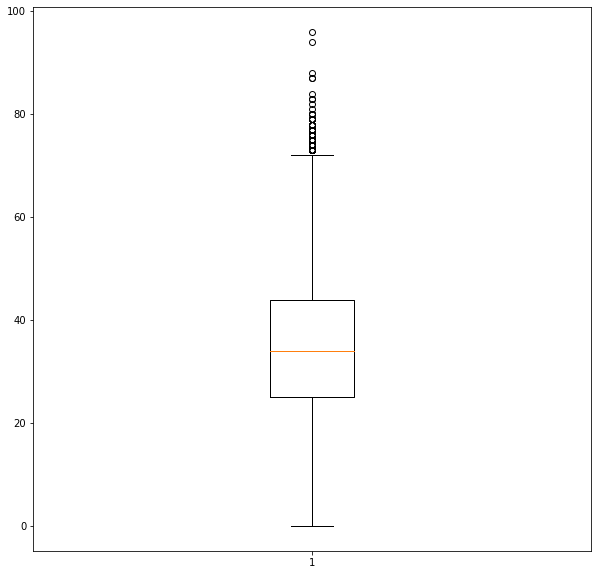

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(sample_df1.AGE)

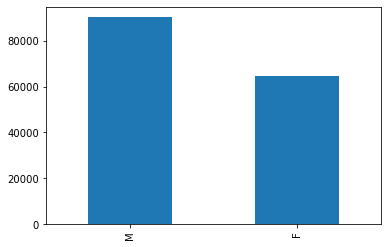

In [21]:
#A look at the gender distribution of work 


rateCount= sample_df1.GENDER.value_counts()
xaxis = rateCount.index
value = rateCount.values

ax = rateCount.plot.bar(x=xaxis, y=value)

<AxesSubplot:xlabel='AGE', ylabel='WORKMODE'>

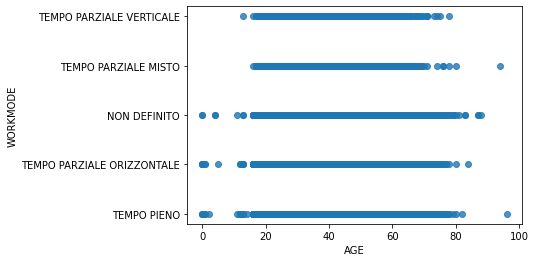

In [22]:
sns.regplot(x = "AGE", y="WORKMODE", data=sample_df1, fit_reg = False, scatter_kws={"alpha": 0.8})

In [23]:
#Group of opportunities in respect to the Provinces.

df1_groupby_sector = data1.groupby('PROVINCE OF BUSINESS')
df1_groupby_sector.size()

PROVINCE OF BUSINESS
BERGAMO             94311
BRESCIA            137935
COMO                27422
CREMONA             30954
LECCO               21290
LODI                 9692
MANTOVA             32365
MILANO             296378
MONZA E BRIANZA     40024
PAVIA               22688
SONDRIO             12657
VARESE              48537
dtype: int64

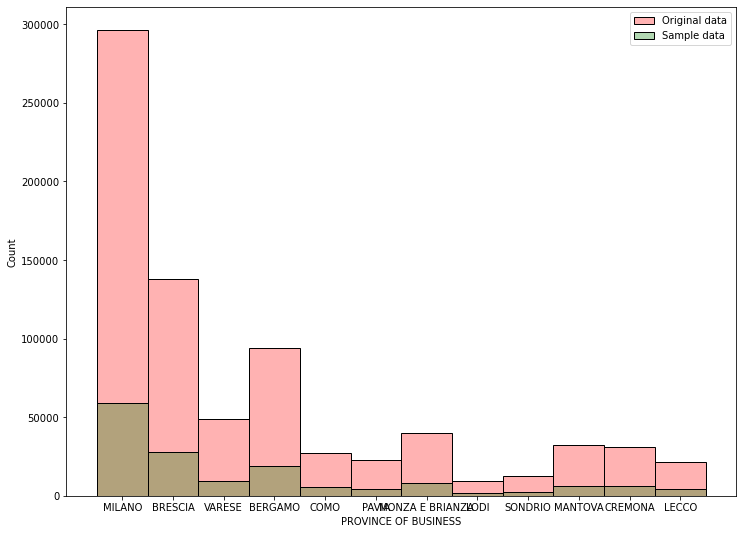

In [24]:
#The prove of the sample value


fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=data1, x="PROVINCE OF BUSINESS", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df1, x="PROVINCE OF BUSINESS", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

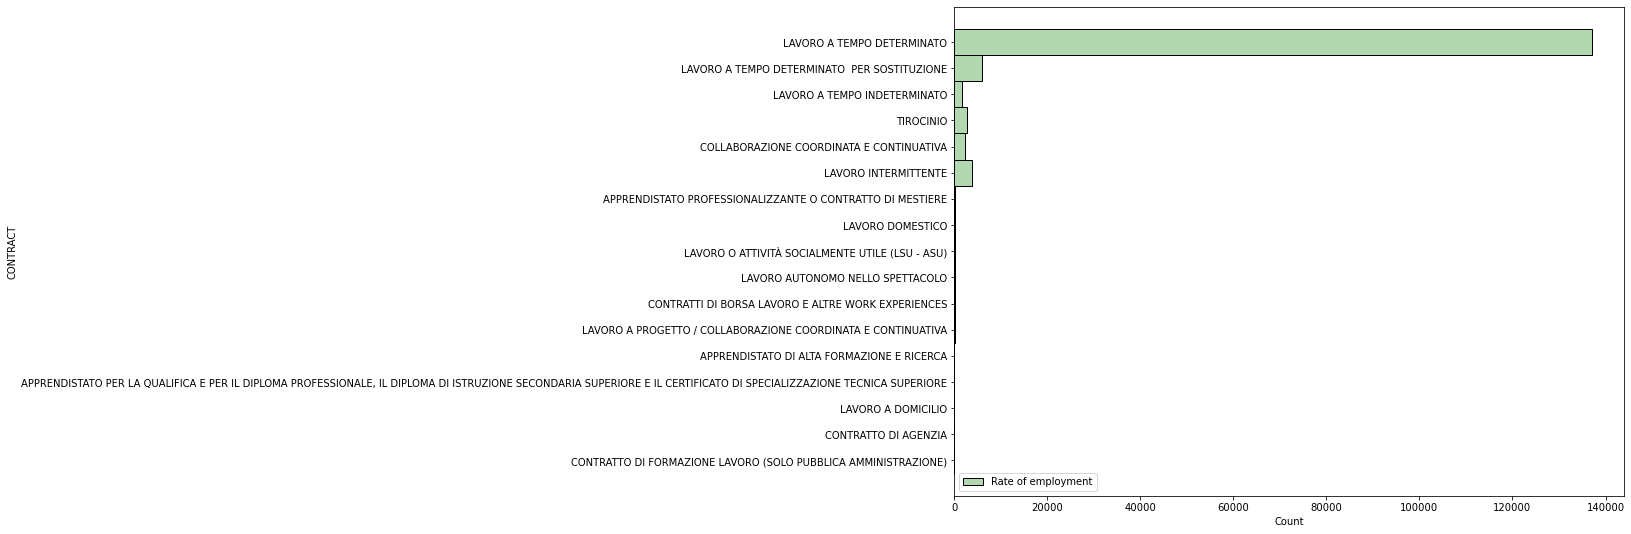

In [25]:
count = sample_df1.CONTRACT.value_counts()

fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df1, y="CONTRACT", label="Rate of employment", color="green", alpha=0.3, bins=12)
plt.legend()
plt.show();

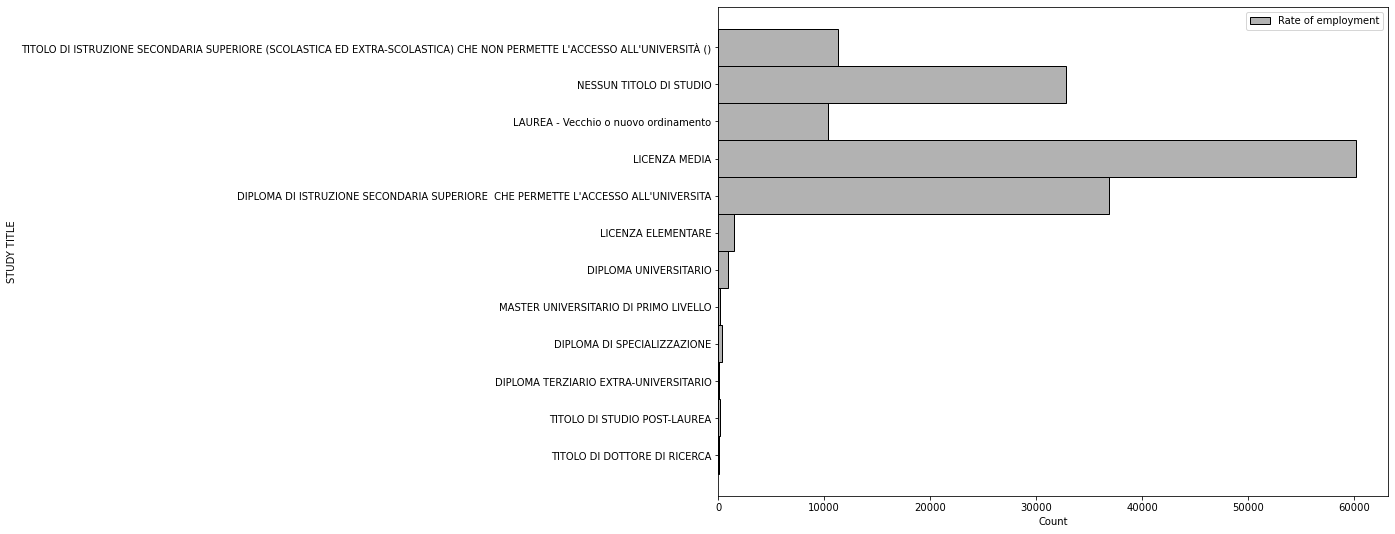

In [26]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df1, y="STUDY TITLE", label="Rate of employment", color="black", alpha=0.3, bins=12)
plt.legend()
plt.show();

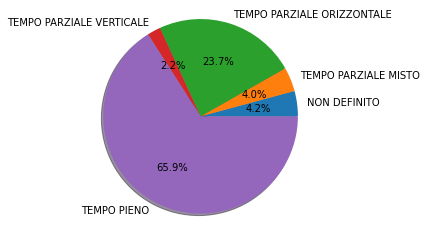

In [27]:
labels = sample_df1['WORKMODE'].astype('category').cat.categories.tolist()
counts = sample_df1['WORKMODE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

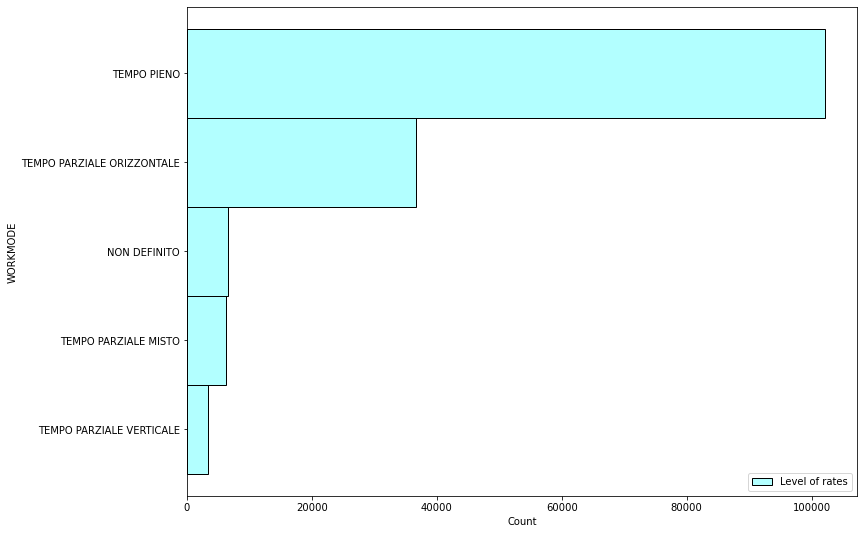

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=sample_df1, y="WORKMODE", label="Level of rates", color="cyan", alpha=0.3, bins=5
)

plt.legend()
plt.show()

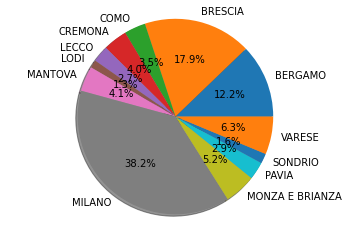

In [29]:
labels = sample_df1['PROVINCE OF BUSINESS'].astype('category').cat.categories.tolist()
counts = sample_df1['PROVINCE OF BUSINESS'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [30]:
cat_sample = sample_df1.select_dtypes(include=['object']).copy()
cat_sample.head()

,DATE,GENDER,ECONOMIC SECTOR DETAIL,STUDY TITLE,CONTRACT,WORKMODE,PROVINCE OF BUSINESS,ITALY
228602,4/8/2016,F,Produzione di prodotti a base di carne (inclus...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,SONDRIO,ITALIA
348483,12/12/2016,F,Altre attività di pulizia specializzata di edi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
650636,5/9/2017,F,Istruzione secondaria di primo grado: scuole m...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,TEMPO PIENO,VARESE,ITALIA
272293,11/9/2016,M,Fabbricazione di altri elementi in legno e di ...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
551331,7/6/2017,M,Ristorazione con somministrazione,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MANTOVA,COSTA D'AVORIO


In [31]:
labels = sample_df1['PROVINCE OF BUSINESS'].astype('category').cat.categories.tolist()
replace_map_comp = {'PROVINCE OF BUSINESS' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'PROVINCE OF BUSINESS': {'BERGAMO': 1, 'BRESCIA': 2, 'COMO': 3, 'CREMONA': 4, 'LECCO': 5, 'LODI': 6, 'MANTOVA': 7, 'MILANO': 8, 'MONZA E BRIANZA': 9, 'PAVIA': 10, 'SONDRIO': 11, 'VARESE': 12}}


In [32]:
sample_df1_replace = sample_df1.copy()

In [33]:
sample_df1_replace.replace(replace_map_comp, inplace=True)

#print(sample_df1_replace.head())


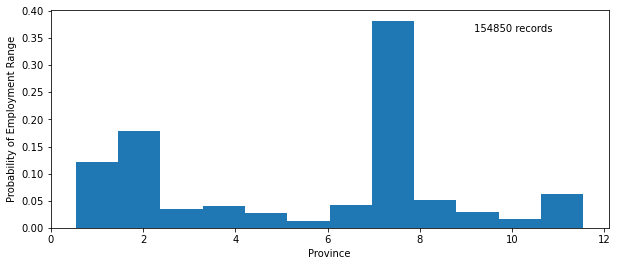

In [34]:
H, edges = np.histogram(sample_df1_replace['PROVINCE OF BUSINESS'], bins=12)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g records" % len(sample_df1_replace),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Province")
ax.set_ylabel("Probability of Employment Range")

plt.show()

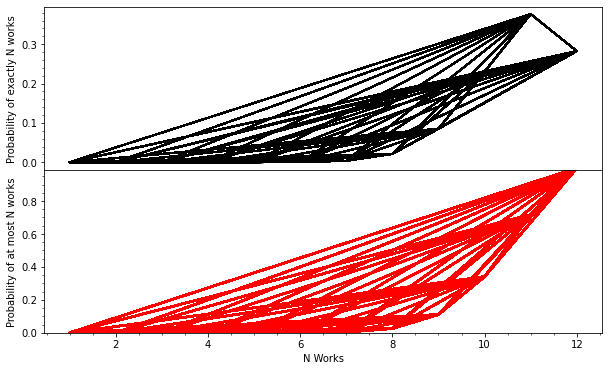

In [35]:
n_work = sample_df1_replace['PROVINCE OF BUSINESS']
total_province = 12
prob_of_success = 0.9
individual_probability = [binom.pmf(x, total_province, prob_of_success) for x in n_work]
cumulative_probability = [binom.cdf(x, total_province, prob_of_success) for x in n_work]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0)

ax = plt.subplot(211)
ax.plot(n_work, individual_probability, color="black")
ax.set_xticklabels([])
ax.set_ylabel("Probability of exactly N works")
ax.minorticks_on()

ax = plt.subplot(212)
ax.plot(n_work, cumulative_probability, color="red", linewidth=2)
ax.set_xlabel("N Works")
ax.set_ylabel("Probability of at most N works")
ax.set_ylim(0, 0.99)
ax.minorticks_on()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.show()

### The gender make-up of the workforce in various province with look on the kind of workmodes.

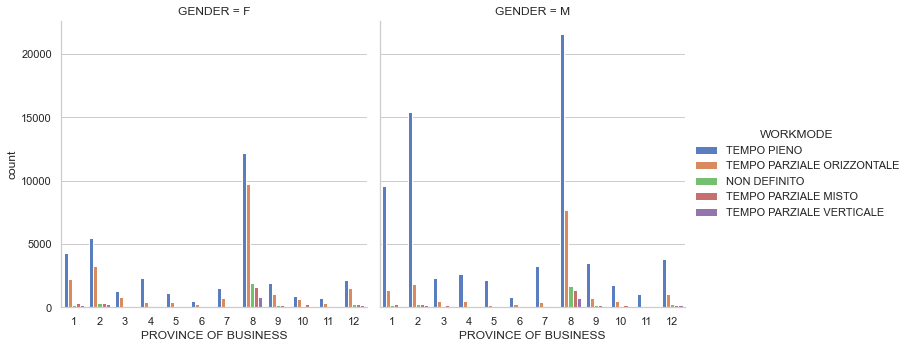

In [36]:
sns.set(style="whitegrid")

g = sns.catplot(x="PROVINCE OF BUSINESS", hue="WORKMODE", col="GENDER", kind="count", data=sample_df1_replace, palette="muted")

In [37]:
data2 = pd.read_csv("lavoro.csv")

In [38]:
data2

,DATE,GENDER,AGE,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
0,10/4/2017,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
1,10/1/2018,M,16,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
2,7/1/2020,F,18,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
3,3/1/2010,F,60,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,7/3/2014,M,60,Altre attività di lavori specializzati di cost...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,LECCO,ITALIA
...,...,...,...,...,...,...,...,...,...
1048570,6/4/2019,F,50,Gelaterie e pasticcerie,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
1048571,10/2/2018,F,52,Strutture di assistenza infermieristica reside...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
1048572,1/2/2012,F,19,Ristorazione con somministrazione,NESSUN TITOLO DI STUDIO,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BRESCIA,ROMANIA
1048573,4/9/2021,M,55,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [39]:
data2.describe(include=object)

,DATE,GENDER,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
count,1048575,1048575,1048154,1048479,1048575,1048575,1048575,1048575
unique,1805,2,1161,12,41,5,12,181
top,1/2/2018,M,Ristorazione con somministrazione,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,4477,563475,66754,283120,733832,560755,438048,796901


In [40]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1048575.0,35.938884,11.924759,0.0,26.0,34.0,44.0,100.0


C:\Users\kwabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness Distribution: 0.57


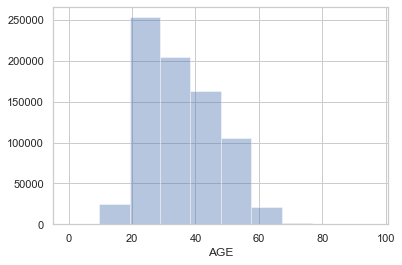

In [41]:
dist = sns.distplot(data1.AGE, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(data2.AGE),2))

In [42]:
def get_dataset_range(data2, show=True):
    """ Gets the dataset date range using the data column.

    Args:
        df (pandas.core.frame.DataFrame): Object representing the Pandas dataframe.
        show (bool): Shows the first and last date available in the dataset.
    Returns: 
        tuple: the dataset date range.
    """
    first = data2['DATE'].iloc[0]
    last = data2['DATE'].iloc[-1]
    if show:
        print(f"FIRST ENTRY DATE: {first}")
        print(f"LAST  ENTRY DATE: {last}")
    return first, last

In [43]:
FIRST_DATE, LAST_DATE = get_dataset_range(data2)

FIRST ENTRY DATE: 10/4/2017
LAST  ENTRY DATE: 4/6/2020


In [44]:
df2_groupby_sector = data2.groupby('STUDY')
df2_groupby_sector.size()


STUDY
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          274218
DIPLOMA DI SPECIALIZZAZIONE                                                                                                  5137
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                         539
DIPLOMA UNIVERSITARIO                                                                                                        7565
LAUREA - Vecchio o nuovo ordinamento                                                                                       116104
LICENZA ELEMENTARE                                                                                                           9617
LICENZA MEDIA                                                                                                              283120
MASTER UNIVERSITARIO DI PRIMO LIVELLO                                               

In [45]:
data2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   DATE      1048575 non-null  object
 1   GENDER    1048575 non-null  object
 2   AGE       1048575 non-null  int64 
 3   SECTOR    1048154 non-null  object
 4   STUDY     1048479 non-null  object
 5   CONTRACT  1048575 non-null  object
 6   WORKMODE  1048575 non-null  object
 7   PROVINCE  1048575 non-null  object
 8   ITALY     1048575 non-null  object
dtypes: int64(1), object(8)
memory usage: 72.0+ MB


C:\Users\kwabe\AppData\Local\Temp/ipykernel_10388/3543585538.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data2.info(verbose=True, null_counts=True)


In [46]:
print(data2.isnull().values.sum())

517


In [47]:
print(data2.isnull().sum())

DATE          0
GENDER        0
AGE           0
SECTOR      421
STUDY        96
CONTRACT      0
WORKMODE      0
PROVINCE      0
ITALY         0
dtype: int64


In [48]:
modeSector = data2['SECTOR'].mode()
print(modeSector)


0    Ristorazione con somministrazione
dtype: object


In [49]:
# Get the percentage of null values for each col.

data2.isnull().sum()/len(data2) * 100

DATE        0.000000
GENDER      0.000000
AGE         0.000000
SECTOR      0.040150
STUDY       0.009155
CONTRACT    0.000000
WORKMODE    0.000000
PROVINCE    0.000000
ITALY       0.000000
dtype: float64

In [50]:
data2.dropna(inplace=True)
print(data2)

              DATE GENDER  AGE  \
0        10/4/2017      M   41   
1        10/1/2018      M   16   
2         7/1/2020      F   18   
3         3/1/2010      F   60   
4         7/3/2014      M   60   
...            ...    ...  ...   
1048570   6/4/2019      F   50   
1048571  10/2/2018      F   52   
1048572   1/2/2012      F   19   
1048573   4/9/2021      M   55   
1048574   4/6/2020      F   51   

                                                    SECTOR  \
0                               Realizzazione di coperture   
1                        Ristorazione con somministrazione   
2                                       Rifugi di montagna   
3        Gestioni di funicolari, ski-lift e seggiovie s...   
4        Altre attività di lavori specializzati di cost...   
...                                                    ...   
1048570                            Gelaterie e pasticcerie   
1048571  Strutture di assistenza infermieristica reside...   
1048572                  Ristoraz

In [51]:
print(data2.isnull().values.sum())

0


#### A sample generation due data size and effective on memmory 

In [52]:
sample_df2 = data2.sample(int(len(data2) * 0.1))
sample_df2.shape


(104805, 9)

In [53]:
print("\n Range value of Study Qualification  ")
print(sample_df2['STUDY'].value_counts().count())

print("\n Range value of work mode  ")
print(sample_df2['WORKMODE'].value_counts().count())

print("\n Range value of economic sector ")
print(sample_df2['SECTOR'].value_counts().count())

print(" \n Range value of contract type ")
print(sample_df2['CONTRACT'].value_counts().count())

print("\n Range value of location ")
print(sample_df2['PROVINCE'].value_counts().count())



 Range value of Study Qualification  
12

 Range value of work mode  
5

 Range value of economic sector 
1039
 
 Range value of contract type 
36

 Range value of location 
12


{'whiskers': [<matplotlib.lines.Line2D at 0x1ecad1955e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecad195d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecad195250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecad1a0370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecad1a0700>],
 'means': []}

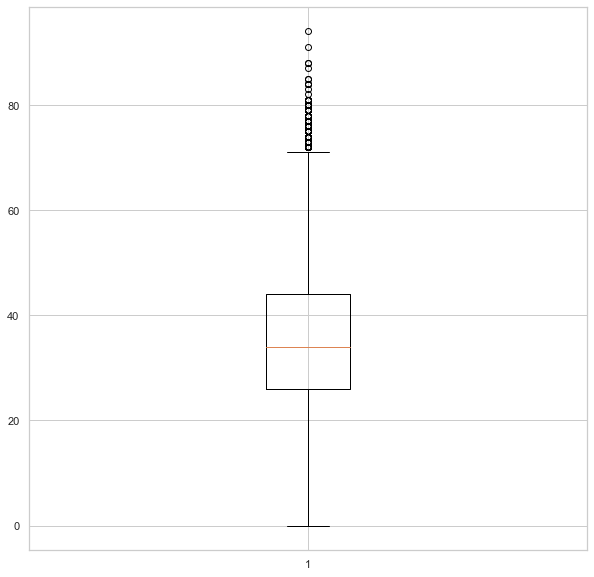

In [54]:
ig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(sample_df2.AGE)

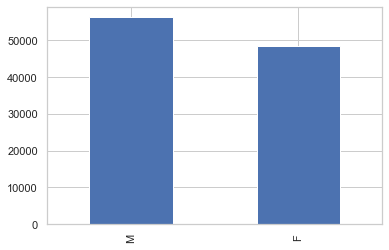

In [55]:
rateCount= sample_df2.GENDER.value_counts()
xaxis = rateCount.index
value = rateCount.values

ax = rateCount.plot.bar(x=xaxis, y=value)

<AxesSubplot:xlabel='AGE', ylabel='WORKMODE'>

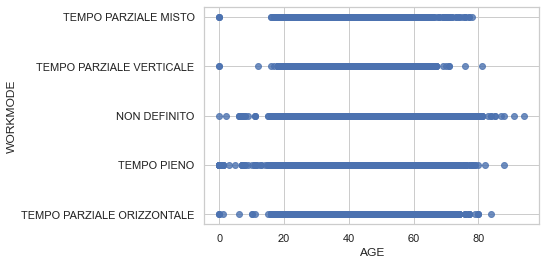

In [56]:
sns.regplot(x = "AGE", y="WORKMODE", data=sample_df2, fit_reg = False, scatter_kws={"alpha": 0.8})

In [57]:
df2_groupby_sector = data2.groupby('STUDY')
df2_groupby_sector.size()

STUDY
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          274092
DIPLOMA DI SPECIALIZZAZIONE                                                                                                  5136
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                         539
DIPLOMA UNIVERSITARIO                                                                                                        7563
LAUREA - Vecchio o nuovo ordinamento                                                                                       116085
LICENZA ELEMENTARE                                                                                                           9612
LICENZA MEDIA                                                                                                              283002
MASTER UNIVERSITARIO DI PRIMO LIVELLO                                               

#### Plot to show the effectiveness of the sample

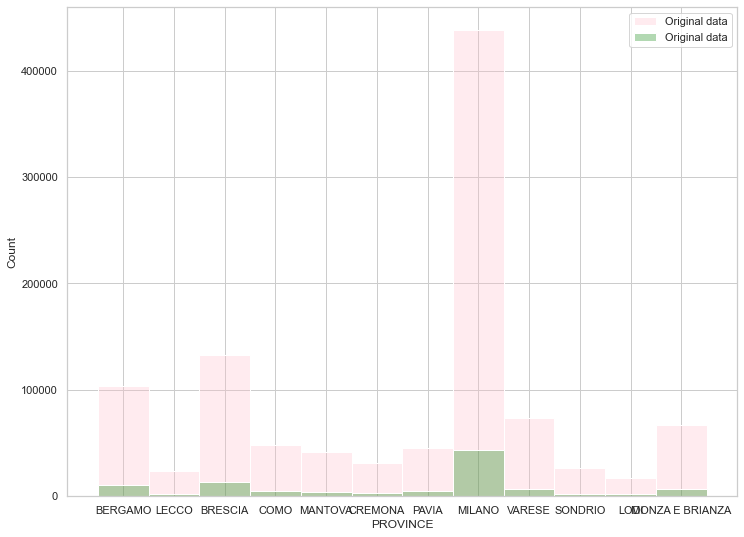

In [58]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=data2, x="PROVINCE", label="Original data", color="pink", alpha=0.3, bins=15
)
sns.histplot(
     data=sample_df2, x="PROVINCE", label="Original data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

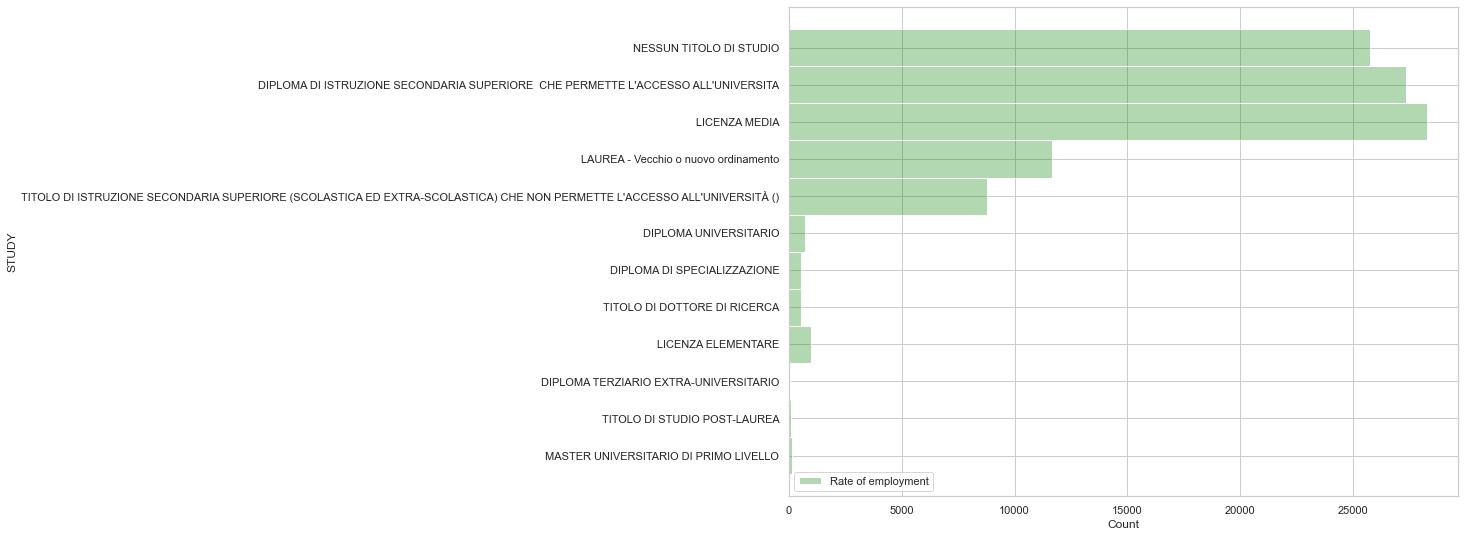

In [59]:
count = sample_df2.STUDY.value_counts()

fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df2, y="STUDY", label="Rate of employment", color="green", alpha=0.3, bins=12)
plt.legend()
plt.show();


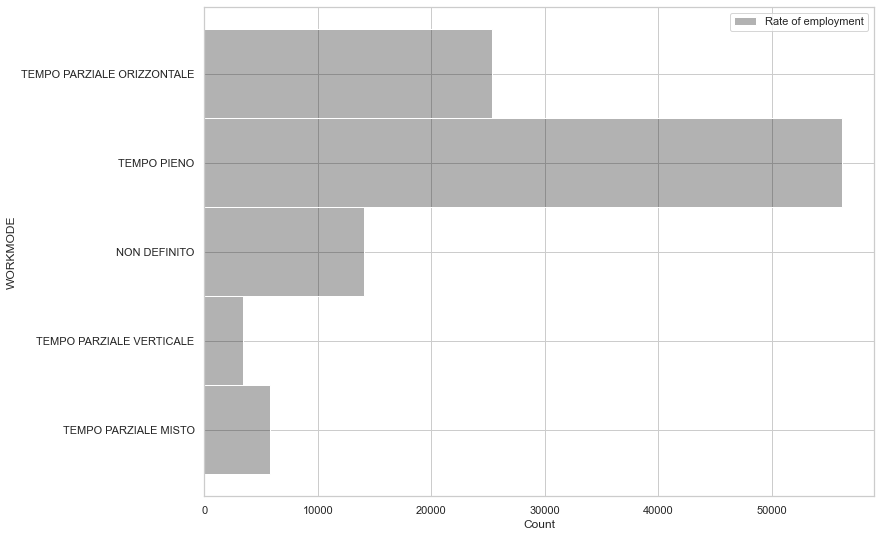

In [60]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
     data=sample_df2, y="WORKMODE", label="Rate of employment", color="black", alpha=0.3, bins=12)
plt.legend()
plt.show();


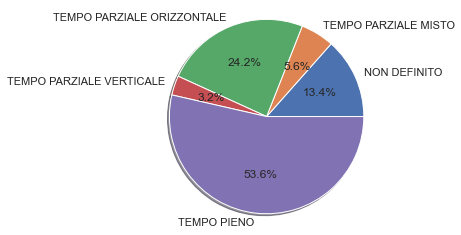

In [61]:

labels = sample_df2['WORKMODE'].astype('category').cat.categories.tolist()
counts = sample_df2['WORKMODE'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()



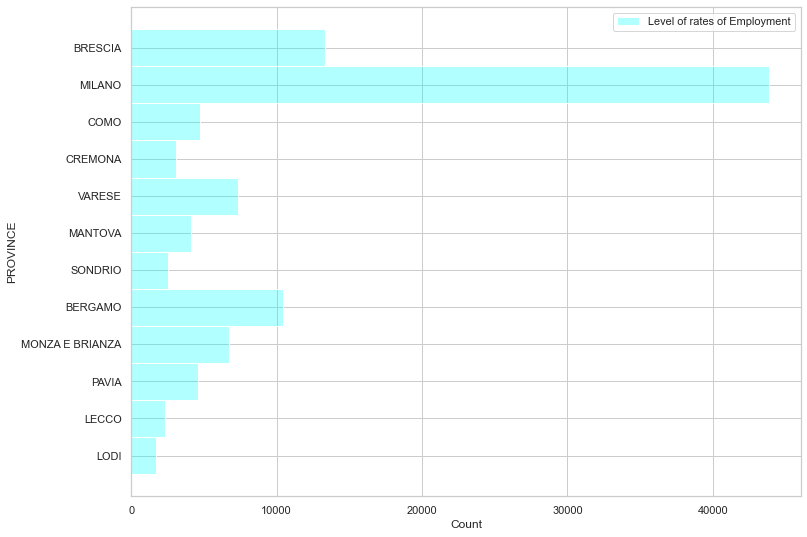

In [62]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=sample_df2, y="PROVINCE", label="Level of rates of Employment", color="cyan", alpha=0.3, bins=5
)

plt.legend()
plt.show()



#### Gender make-up of the labour force.

In [63]:
labels = sample_df2['GENDER'].astype('category').cat.categories.tolist()
counts = sample_df2['GENDER'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

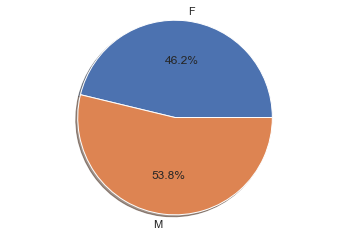

In [64]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [65]:

cat_sample = sample_df2.select_dtypes(include=['object']).copy()
cat_sample.head()

,DATE,GENDER,SECTOR,STUDY,CONTRACT,WORKMODE,PROVINCE,ITALY
964980,9/1/2009,M,Mense,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
360706,11/7/2011,F,Istruzione primaria: scuole elementari,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
938894,1/4/2016,M,Commercio all'ingrosso di imbarcazioni da diporto,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
389307,9/2/2010,M,Altri lavori di completamento e di finitura de...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,UCRAINA
18291,9/1/2015,M,Noleggio di autovetture ed autoveicoli leggeri,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,COMO,ITALIA


In [66]:
#Label for the study modes

labels = sample_df2['STUDY'].astype('category').cat.categories.tolist()
replace_map_comp = {'STUDY' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

#print(replace_map_comp)

In [67]:
sample_df2_replace = sample_df2.copy()

In [68]:
sample_df2_replace.replace(replace_map_comp, inplace=True)

#print(sample_df2_replace.head())


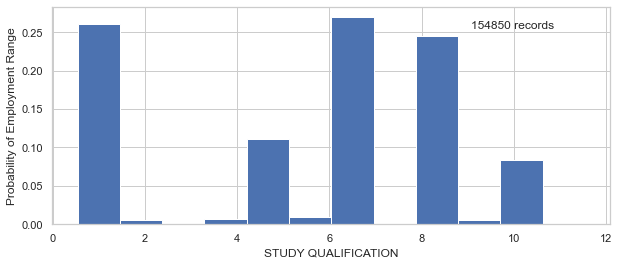

In [69]:
H, edges = np.histogram(sample_df2_replace['STUDY'], bins=12)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g records" % len(sample_df1_replace),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("STUDY QUALIFICATION")
ax.set_ylabel("Probability of Employment Range")

plt.show()


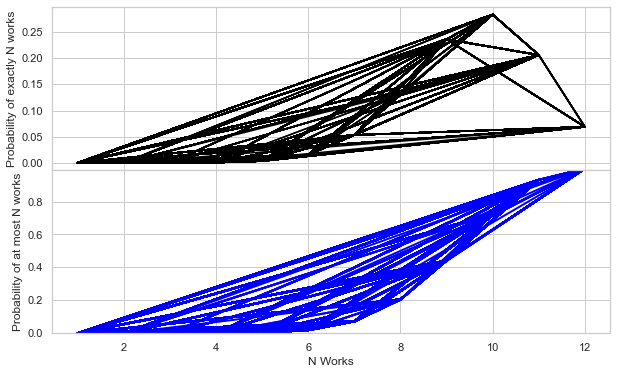

In [70]:

n_work = sample_df2_replace['STUDY']
total = 12
prob_of_success = 0.8
individual_probability = [binom.pmf(x, total, prob_of_success) for x in n_work]
cumulative_probability = [binom.cdf(x, total, prob_of_success) for x in n_work]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0)

ax = plt.subplot(211)
ax.plot(n_work, individual_probability, color="black")
ax.set_xticklabels([])
ax.set_ylabel("Probability of exactly N works")
ax.minorticks_on()

ax = plt.subplot(212)
ax.plot(n_work, cumulative_probability, color="blue", linewidth=2)
ax.set_xlabel("N Works")
ax.set_ylabel("Probability of at most N works")
ax.set_ylim(0, 0.99)
ax.minorticks_on()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.show()



#### A look at the various study levels and kind of workmodes based on gender distribution.

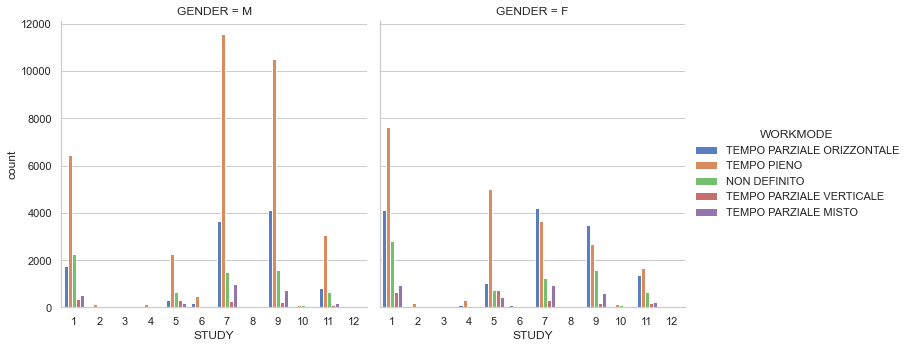

In [71]:
sns.set(style="whitegrid")

g = sns.catplot(x="STUDY", hue="WORKMODE", col="GENDER", kind="count", data=sample_df2_replace, palette="muted")

Linear Regression on the dataset

In [72]:
X = sample_df1[['ECONOMIC SECTOR DETAIL','STUDY TITLE','WORKMODE']]

In the above data frame, we have 'ECONOMIC SECTOR DETAIL','STUDY TITLE'and 'WORKMODE'as a categorical variable, so we need to add dummy variables instead

In [74]:
X = pd.get_dummies(data=X, drop_first=True)
#X.head()

#above code added the dummy variable in form of 0 and 1, which is easy to interpret for the regression model.

In [75]:
Y = sample_df1['AGE']

Creating a train and test dataset.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92910, 1075)
(61940, 1075)
(92910,)
(61940,)


After splitting the dataset into a test and train we will be importing the Linear Regression model.

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
# print the intercept

print(model.intercept_)

29.03733182780074


The intercept (often labeled the constant) is the expected mean value of Y when all X=0. In a purely mathematical sense, this definition is correct. Unfortunately, it’s frequently impossible to set all variables to zero because this combination can be an impossible or irrational arrangement.

In [79]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
ECONOMIC SECTOR DETAIL_Acquacoltura in acque dolci e servizi connessi,16.206666
ECONOMIC SECTOR DETAIL_Affari esteri,9.652224
"ECONOMIC SECTOR DETAIL_Affittacamere per brevi soggiorni, case ed appartamenti per vacanze, bed and breakfast, residence",7.816896
ECONOMIC SECTOR DETAIL_Affitto di aziende,7.246246
ECONOMIC SECTOR DETAIL_Agenti di assicurazioni,5.059895
...,...
STUDY TITLE_TITOLO DI STUDIO POST-LAUREA,0.187294
WORKMODE_TEMPO PARZIALE MISTO,-1.902350
WORKMODE_TEMPO PARZIALE ORIZZONTALE,-1.416465
WORKMODE_TEMPO PARZIALE VERTICALE,-1.530680


The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

<ul>A positive sign indicates that as the predictor variable increases, the Target variable also increases.</ul>
<ul>A negative sign indicates that as the predictor variable increases, the Target variable decreases.</ul>


In [80]:
predictions = model.predict(X_test)
predictions

array([36.80336569, 34.83550022, 33.77293191, ..., 37.15724934,
       32.01294984, 34.73793689])

C:\Users\kwabe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

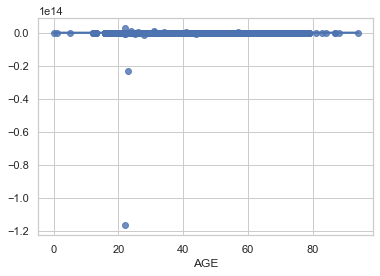

In [81]:
sns.regplot(y_test,predictions)

In [83]:
print(sample_df1.keys())

Index(['DATE', 'GENDER', 'AGE', 'ECONOMIC SECTOR DETAIL', 'STUDY TITLE',
       'CONTRACT', 'WORKMODE', 'PROVINCE OF BUSINESS', 'ITALY'],
      dtype='object')


#### Supervised Learning

Decision Tree algorithm is one of the most powerful and popular algorithm.It works for both continuous as well as categorical output variables. 

**Decision trees give backing evidence to support a decision**. Using a decision tree helps to give the scope of the classification results of features.

In [102]:
# Function to split the dataset
def splitdataset(sample_df1):
  
    # Separating the target variable
    X = sample_df1.drop(['DATE','STUDY TITLE'], axis = 1)
    X = pd.get_dummies(X,
                   columns=['GENDER','AGE', 'ECONOMIC SECTOR DETAIL','CONTRACT', 'WORKMODE',
                            'PROVINCE OF BUSINESS','ITALY'])
    Y = sample_df1.values[:, 4]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [103]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
        random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

    print("Report : ", classification_report(y_test, y_pred))

# Driver code
def main():

    # Building Phase
    data = sample_df1
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)


In [104]:
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
['NESSUN TITOLO DI STUDIO' 'NESSUN TITOLO DI STUDIO'
 "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA"
 ... 'NESSUN TITOLO DI STUDIO' 'NESSUN TITOLO DI STUDIO'
 'NESSUN TITOLO DI STUDIO']
Confusion Matrix:  [[ 1663     0     0     0   175     0  8058     0  1139     0     0     0]
 [   30     0     0     0     1     0    71     0     9     0     0     0]
 [    2     0     0     0     1     0    19     0     1     0     0     0]
 [   46     0     0     0     7     0   180     0    31     0     0     0]
 [  905     0     0     0   276     0  1798     0   226     0     0     0]
 [   16     0     0     0     0     2   187     0   215     0     0     0]
 [  935     0     0     0    17     5 12847     0  4176     0     0     0]
 [    9     0     0     0     0     0    29     0    10     0     0     0]
 [  627     0     0     0     0     0  4235     0  5024     0     0     0]
 [   11     0     0     0     0     0  

C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                                                                                                                           precision    recall  f1-score   support

                                      DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA       0.36      0.15      0.21     11035
                                                                                            DIPLOMA DI SPECIALIZZAZIONE       0.00      0.00      0.00       111
                                                                                  DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO       0.00      0.00      0.00        23
                                                                                                  DIPLOMA UNIVERSITARIO       0.00      0.00      0.00       264
                                                                                   LAUREA - Vecchio o nuovo ordinamento       0.56      0.09      0.15      3205
                       

C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report :                                                                                                                           precision    recall  f1-score   support

                                      DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA       0.35      0.14      0.20     11035
                                                                                            DIPLOMA DI SPECIALIZZAZIONE       0.00      0.00      0.00       111
                                                                                  DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO       0.00      0.00      0.00        23
                                                                                                  DIPLOMA UNIVERSITARIO       0.00      0.00      0.00       264
                                                                                   LAUREA - Vecchio o nuovo ordinamento       0.50      0.13      0.21      3205
                       

C:\Users\kwabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
